# Fake News Detection using NLP
## Framework steps

1. Pre-processing
2. Feature Extraction
3. Classification Model
4. Evaluation

## Importing Libraries

In [1]:
# Importing The most fundamental libraries

!pip install scikit-plot
# !pip install wordcloud

import pandas as pd
import numpy as np
import nltk
import os
import re
import string
import time

# for pre-processing dataset
from nltk import ngrams
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from nltk.tokenize import word_tokenize

# for feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier

# for Splitting our dataset
from sklearn.model_selection import train_test_split

# for building classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

# for evaluation our model
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# for plotting our confusion matrix
import matplotlib.pyplot as plt
import scikitplot as skplt

#specify english stop words only
nltk.download('stopwords')
stops= stopwords.words('english') 

nltk.download('wordnet')
nltk.download('punkt')

# append rt for stop word dictionary
stops.append("rt") 

#Create stemmer obejct
porter = PorterStemmer()

You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.


[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Pre-Processing

In [2]:
# Cleanning Our dataset by removing unwanted Characters, Non Letters and Punctuation
def cleanText(csv_file):
    # Reading our dataset as pandas dataframe
    data = pd.read_csv(csv_file)
    # dropping the id, title and author column
    data = data.drop(columns=['id','author']) 
    # droping all null values in our data
    data = data.dropna() 
    data = data.reset_index(drop = True)
    
    return data

# Cleanning our text and converting it to lower case, delete stopwords, Stemming and remove punctuation
def stem_tokenize(data):

    # Frist converting all letters to lower case
    data= data.lower()

    # removing unwanted digits ,special chracters from the text
    data= ' '.join(re.sub("(@[A-Za-z0-9]+)", " ", data).split())
    data= ' '.join(re.sub("^@?(\w){1,15}$", " ", data).split())
    data= ' '.join(re.sub("(\w+:\/\/\S+)", " ", data).split())

    # removing stopwards and numbers from STRING library
    table= str.maketrans('', '', string.punctuation+string.digits)
    data = data.translate(table)
  
    # Split Sentence as tokens words 
    token = word_tokenize(data)
  
    # converting words to their root forms by STEMMING THE WORDS 
    stem = [porter.stem(word) for word in token] 
  
    # remove stopwords from our text
    words = [word for word in stem if not word in stops]
    data  = ' '.join(words)

    return data

# Splitting our Dataset into trainning and testing sets 80/20
def Splite_clean_data(csv_file, colX, colY):
    
    # reading Clean Dataset
    df = cleanText(csv_file)
    
    # Applying Clean function to remove unwanted characters , stopwords and apply STEMMING
    for i in range(len(df)):
        df.loc[i, colX] = stem_tokenize(df.loc[i,colX])

    # Splitting dataset into trainning and testing sets
    x_train, x_test, y_train, y_test = train_test_split(df[colX], df[colY], test_size=0.2, random_state=7)
    
    return x_train, x_test, y_train, y_test

## Feature Extraction
### TF-IDF

In [3]:
def TF_IDF(Model, title):

    # Spiltting the dataset after calling Clean function to pre-process datat before extracting feature
    xtrain, xtest, ytrain, ytest = Splite_clean_data('train.csv', 'text', 'label')

    # Initialization TF-IDF vector model to convert all textual content to numercial one
    vector = TfidfVectorizer(stop_words='english', max_df=0.7)
    train_vector = vector.fit_transform(xtrain)
    test_vector  = vector.transform(xtest)
    
    TF_IDF_model     = Model
    TF_IDF_model.fit(train_vector, ytrain)
    test_pred = TF_IDF_model.predict(test_vector)
    
    # Calculating accuracy score for trainning model
    accuracy  = TF_IDF_model.score(train_vector, ytrain)*100
    y_pred = TF_IDF_model.predict(test_vector)
    
    # Calculating accuracy score for testing model
    acc_score = accuracy_score(ytest, y_pred)*100
    class_report = classification_report(ytest, y_pred, output_dict=True)
    class_df = pd.DataFrame(class_report).transpose()

    # Calculating f1_score for evalution our model
    test_f1score = f1_score(ytest, y_pred)*100
    
    # plotting Confusin Matrix 
    skplt.metrics.plot_confusion_matrix(ytest, y_pred)
    
    print(title), print('*'*len(title))
    print('Accuracy score train set :'+ format(accuracy, '.2f') + "%")
    print('Accuracy score test set  :'+ format(acc_score, '.2f') + "%",'\n')
    print('F1 score:'+ format(test_f1score, '.2f') + "%",'\n'), print('*'*len(title))
    print('Classification Report: ')
    print(class_df, '\n'), print('*'*len(title))
    plt.show()
    print('-'*80)

### Count Vectorizer

In [4]:
def Count_Vector(Model, title, n):
    
    # Spiltting the dataset after calling Clean function to pre-process datat before extracting feature
    xtrain, xtest, ytrain, ytest = Splite_clean_data('train.csv', 'text', 'label')

    # Initialization Count Vectorizer vector model to convert all textual content to numercial one
    vector = CountVectorizer(max_features=1000 , ngram_range=(n,n))
    train_vector = vector.fit_transform(xtrain)
    test_vector = vector.transform(xtest)
    
    count_vector_model     = Model
    count_vector_model.fit(train_vector, ytrain)
    y_pred = count_vector_model.predict(test_vector)
    
    # Calculating accuracy score for trainning model
    accuracy  = count_vector_model.score(train_vector, ytrain)*100
    y_pred = count_vector_model.predict(test_vector)
    
    # Calculating accuracy score for testing model
    acc_score = accuracy_score(ytest, y_pred)*100
    class_report = classification_report(ytest, y_pred, output_dict=True)
    class_df = pd.DataFrame(class_report).transpose()

    # Calculating f1_score for evalution our model
    test_f1score = f1_score(ytest, y_pred)*100
    
    # plotting Confusin Matrix 
    skplt.metrics.plot_confusion_matrix(ytest, y_pred)
    
    print("Models with " , n , "-grams :\n")
    print('********************** \n')
    print(title), print('*'*len(title))
    print('Accuracy score train set : '+ format(accuracy, '.2f') + "%")
    print('Accuracy score test set  : '+ format(acc_score, '.2f') + "%",'\n')
    print('F1 score : '+ format(test_f1score, '.2f') + "%",'\n'), print('*'*len(title))
    print('Classification Report: ')
    print(class_df, '\n'), print('*'*len(title))
    plt.show()
    print('-'*80)

## Classification Models

### Logistic Regression Classifier

In [5]:
def TF_IDF_LR_Model():
    # Logistic Regression Classifier with TF_IDF
    PA_Model = TF_IDF(Model = LogisticRegression(), 
                      title='TFIDF with Logistic Regression Classifier: \n')
    return PA_Model

In [6]:
def Count_Vect_LR_Model():
    # Logistic Regression  Classifier with count vectorizer
    PA_Model = Count_Vector(Model = LogisticRegression(), 
                            title='Count Vectorizer with Logistic Regression Classifier: \n',
                            n=2)
    return PA_Model

### Random Forest Classifier

In [7]:
def TF_IDF_RF_Model():
    # Random Forest Classifier with TF_IDF
    RF_Model = TF_IDF(Model=RandomForestClassifier(), 
                            title='TF-IDF with Random Forest Classifier : \n ')
    return RF_Model

In [8]:
def Count_Vect_RF_Model():
    # Random Forest Classifier with Count Vectorizer
    RF_Model = Count_Vector(Model=RandomForestClassifier(), 
                            title='Count Vectorizer Random Forest Classifier: \n ', 
                            n=2)
    return RF_Model

### Support Vector Machine Classifier

In [9]:
def TF_IDF_SVM_Model():
    # Support vector machine Classifier with TF-IDF
    SVM_Model = TF_IDF(Model=svm.LinearSVC(), 
                            title='TF-IDF with Support vector machine Classifier: \n ')
    return SVM_Model

In [10]:
def Count_Vect_SVM_Model():
    # Support vector machine Classifier with Count Vectorizer
    SVM_Model = Count_Vector(Model=svm.LinearSVC(), 
                            title='Count Vectorizer with Support vector machine Classifier : \n ', 
                            n=2)
    return SVM_Model

## Evaluation Methods

TFIDF with Logistic Regression Classifier: 

********************************************
Accuracy score train set :96.94%
Accuracy score test set  :94.53% 

F1 score:94.37% 

********************************************
Classification Report: 
              precision    recall  f1-score      support
0              0.953511  0.940306  0.946862  2094.000000
1              0.936741  0.950693  0.943666  1947.000000
accuracy       0.945311  0.945311  0.945311     0.945311
macro avg      0.945126  0.945500  0.945264  4041.000000
weighted avg   0.945431  0.945311  0.945322  4041.000000 

********************************************


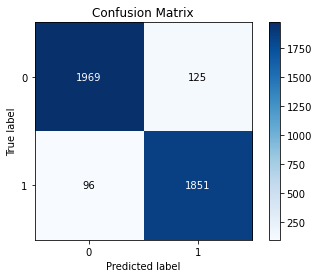

--------------------------------------------------------------------------------


In [11]:
# TFIDF with  Logistic regression classification Model 
if __name__ == '__main__':
    TF_IDF_LR_Model()

Models with  2 -grams :

********************** 

Count Vectorizer with Logistic Regression Classifier: 

*******************************************************
Accuracy score train set : 92.07%
Accuracy score test set  : 88.12% 

F1 score : 88.05% 

*******************************************************
Classification Report: 
              precision    recall  f1-score      support
0              0.909229  0.856256  0.881948  2094.000000
1              0.854519  0.908064  0.880478  1947.000000
accuracy       0.881218  0.881218  0.881218     0.881218
macro avg      0.881874  0.882160  0.881213  4041.000000
weighted avg   0.882869  0.881218  0.881240  4041.000000 

*******************************************************


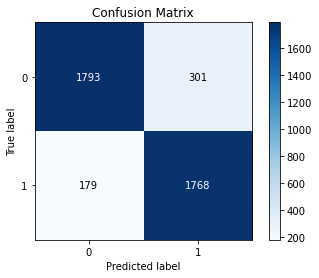

--------------------------------------------------------------------------------


In [12]:
# Count Vectorizer with Logistic regression classification Model
if __name__ == '__main__':
    Count_Vect_LR_Model()

TF-IDF with Random Forest Classifier : 
 
*****************************************
Accuracy score train set :99.99%
Accuracy score test set  :90.62% 

F1 score:89.89% 

*****************************************
Classification Report: 
              precision    recall  f1-score      support
0              0.882983  0.944126  0.912532  2094.000000
1              0.935072  0.865434  0.898906  1947.000000
accuracy       0.906211  0.906211  0.906211     0.906211
macro avg      0.909028  0.904780  0.905719  4041.000000
weighted avg   0.908080  0.906211  0.905967  4041.000000 

*****************************************


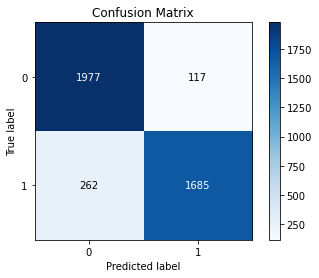

--------------------------------------------------------------------------------


In [13]:
# TFIDF with Random Forest classification Model 
if __name__ == '__main__':
    TF_IDF_RF_Model()

Models with  2 -grams :

********************** 

Count Vectorizer Random Forest Classifier: 
 
*********************************************
Accuracy score train set : 99.67%
Accuracy score test set  : 87.78% 

F1 score : 87.25% 

*********************************************
Classification Report: 
              precision    recall  f1-score      support
0              0.878788  0.886342  0.882549  2094.000000
1              0.876620  0.868516  0.872549  1947.000000
accuracy       0.877753  0.877753  0.877753     0.877753
macro avg      0.877704  0.877429  0.877549  4041.000000
weighted avg   0.877743  0.877753  0.877731  4041.000000 

*********************************************


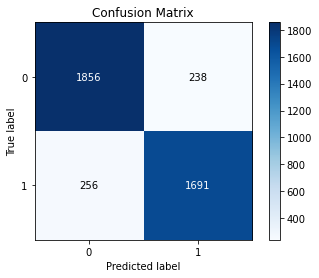

--------------------------------------------------------------------------------


In [14]:
# Count Vectorizer with Random Forest classification Model
if __name__ == '__main__':
    Count_Vect_RF_Model()

TF-IDF with Support vector machine Classifier: 
 
*************************************************
Accuracy score train set :99.87%
Accuracy score test set  :95.77% 

F1 score:95.63% 

*************************************************
Classification Report: 
              precision    recall  f1-score      support
0              0.962927  0.955110  0.959003  2094.000000
1              0.952138  0.960452  0.956277  1947.000000
accuracy       0.957684  0.957684  0.957684     0.957684
macro avg      0.957533  0.957781  0.957640  4041.000000
weighted avg   0.957729  0.957684  0.957689  4041.000000 

*************************************************


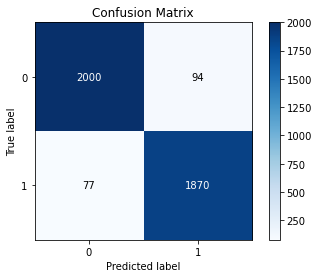

--------------------------------------------------------------------------------


In [15]:
# TF-IDF with SVM classification Model
if __name__ == '__main__':
    TF_IDF_SVM_Model()

Models with  2 -grams :

********************** 

Count Vectorizer with Support vector machine Classifier : 
 
************************************************************
Accuracy score train set : 92.02%
Accuracy score test set  : 88.02% 

F1 score : 87.96% 

************************************************************
Classification Report: 
              precision    recall  f1-score      support
0              0.909045  0.854346  0.880847  2094.000000
1              0.852870  0.908064  0.879602  1947.000000
accuracy       0.880228  0.880228  0.880228     0.880228
macro avg      0.880957  0.881205  0.880224  4041.000000
weighted avg   0.881979  0.880228  0.880247  4041.000000 

************************************************************


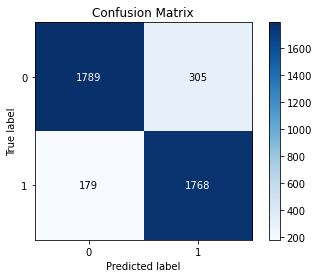

--------------------------------------------------------------------------------


In [16]:
# Count Vectorizer with SVM classification Model
if __name__ == '__main__':
    Count_Vect_SVM_Model()

<!--  -->

<!--  -->